In [1]:
import tensorflow
import tensorflow.keras
import pathlib
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
from skimage import io
import pandas as pd
import numpy as np

In [2]:
#Creating data dictionary
data_dict = pathlib.Path('D:\\Data Science\\Main Course\\Deep Learning\\CNN\\flower classification\\own model\\flowers')

In [3]:
#counting data set 
image_count = len(list(data_dict.glob('*/*.jpg')))
image_count

4317

In [4]:
#Specifying parameters
batch_size = 32
img_height = 180
img_width = 180

In [5]:
#Creating data sets
train_data_set = tensorflow.keras.preprocessing.image_dataset_from_directory(data_dict, validation_split= 0.2, subset= 'training', seed= 123, image_size=(img_height, img_width), batch_size= batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [6]:
Validation_data_set = tensorflow.keras.preprocessing.image_dataset_from_directory(data_dict, validation_split= 0.2, subset= 'validation', seed= 123, image_size=(img_height, img_width), batch_size= batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [7]:
#classes
classes = train_data_set.class_names
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

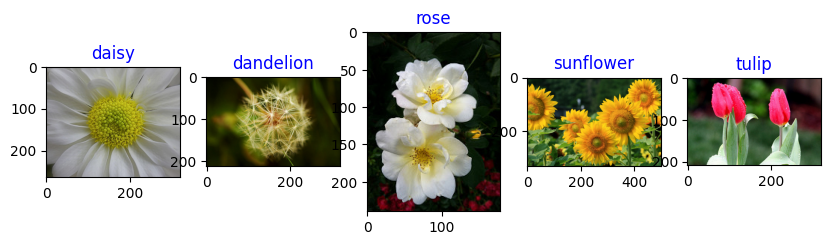

In [8]:
#Visualising soem data points from all classes
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(len(classes)): 
  plt.subplot(1, 5, 1+i)
  image = mpimg.imread(str(list(data_dict.glob(classes[i]+'/*.jpg'))[0]))
  plt.title(classes[i], color= 'blue')
  plt.imshow(image)

In [9]:
AUTOTUNE = tensorflow.data.experimental.AUTOTUNE
data_set = train_data_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [10]:
#Importing layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Dense, Flatten, Activation, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [11]:
input_shape = (180,180,3)

model = Sequential()

#Adding layers
#Rescaling Images
model.add(tensorflow.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape= input_shape))
#Adding first layer
model.add(Conv2D(32,(3,3), padding= 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding= 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), padding= 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(len(classes)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 178, 178, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 178, 178, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 178, 178, 32)      1

In [12]:
#Compilation of model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_data_set, validation_data= Validation_data_set, epochs= 20)

Epoch 1/20
108/108 [==============================] - 37s 252ms/step - loss: 3.2386 - accuracy: 0.3011 - val_loss: 1.7889 - val_accuracy: 0.2851
Epoch 2/20
108/108 [==============================] - 23s 215ms/step - loss: 1.6389 - accuracy: 0.3567 - val_loss: 2.1560 - val_accuracy: 0.2827
Epoch 3/20
108/108 [==============================] - 23s 216ms/step - loss: 1.4327 - accuracy: 0.4163 - val_loss: 1.4722 - val_accuracy: 0.3835
Epoch 4/20
108/108 [==============================] - 23s 216ms/step - loss: 1.3126 - accuracy: 0.4800 - val_loss: 1.4592 - val_accuracy: 0.3615
Epoch 5/20
108/108 [==============================] - 24s 217ms/step - loss: 1.2226 - accuracy: 0.5269 - val_loss: 1.2276 - val_accuracy: 0.5006
Epoch 6/20
108/108 [==============================] - 24s 219ms/step - loss: 1.1248 - accuracy: 0.5698 - val_loss: 1.5845 - val_accuracy: 0.4728
Epoch 7/20
108/108 [==============================] - 24s 219ms/step - loss: 1.0215 - accuracy: 0.6034 - val_loss: 1.1623 - val_ac

In [14]:
#Checking accuracy
acc = model.evaluate(train_data_set)[1]
acc_val = model.evaluate(Validation_data_set)[1]
print('training accuracy =', acc)
print('validation accuracy =', acc_val)
#there is overfitting present in model

27/27 [==============================] - 1s 50ms/step - loss: 1.0332 - accuracy: 0.6570
training accuracy = 0.9253039956092834
validation accuracy = 0.6570104360580444


In [15]:
#Building model using augmentation
model2 = Sequential([layers.experimental.preprocessing.RandomFlip('horizontal', input_shape= (img_height, img_width,3)),
                    layers.experimental.preprocessing.RandomFlip('vertical', input_shape= (img_height,img_width,3)),
                    layers.experimental.preprocessing.RandomRotation(0.1),
                    layers.experimental.preprocessing.RandomZoom(0.2)])

In [16]:
model2.add(tensorflow.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape= input_shape))
#Adding first layer
model2.add(Conv2D(32,(3,3), padding= 'same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32,(3,3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(64,(3,3), padding= 'same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64,(3,3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(128,(3,3), padding= 'same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128,(3,3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))

model2.add(Dense(len(classes)))
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (None, 180, 180, 3)       0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 180, 180, 3)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 180, 180, 32)     

In [17]:
#Compile the model
model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model2.fit(train_data_set, validation_data= Validation_data_set, epochs= 20)

Epoch 1/20
108/108 [==============================] - 26s 227ms/step - loss: 2.8892 - accuracy: 0.2791 - val_loss: 1.9668 - val_accuracy: 0.2920
Epoch 2/20
108/108 [==============================] - 24s 225ms/step - loss: 1.6309 - accuracy: 0.3248 - val_loss: 1.5132 - val_accuracy: 0.3105
Epoch 3/20
108/108 [==============================] - 24s 225ms/step - loss: 1.5647 - accuracy: 0.3555 - val_loss: 1.4473 - val_accuracy: 0.3824
Epoch 4/20
108/108 [==============================] - 24s 225ms/step - loss: 1.4249 - accuracy: 0.3937 - val_loss: 1.3725 - val_accuracy: 0.4125
Epoch 5/20
108/108 [==============================] - 24s 225ms/step - loss: 1.4378 - accuracy: 0.3891 - val_loss: 1.2926 - val_accuracy: 0.4322
Epoch 6/20
108/108 [==============================] - 24s 225ms/step - loss: 1.3659 - accuracy: 0.4082 - val_loss: 1.2063 - val_accuracy: 0.4936
Epoch 7/20
108/108 [==============================] - 24s 225ms/step - loss: 1.3134 - accuracy: 0.4421 - val_loss: 1.2363 - val_ac

In [19]:
#Checking for accuracy
acc_train = model2.evaluate(train_data_set)[1]
acc_vali = model2.evaluate(Validation_data_set)[1]
print('training accuracy_model2 =', acc_train)
print('vaidation accuracy_model2 =', acc_vali)
#It looks like overfitting problem resolved but accuracy is not so good

27/27 [==============================] - 1s 51ms/step - loss: 0.8928 - accuracy: 0.6582
training accuracy_model2 = 0.655471920967102
vaidation accuracy_model2 = 0.658169150352478


In [20]:
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [21]:
dict_data = {}
for i in range(0,len(classes)):
    dict_data[classes[i]] = len(list(data_dict.glob(classes[i]+'/*.jpg')))
dict_data

{'daisy': 764, 'dandelion': 1052, 'rose': 784, 'sunflower': 733, 'tulip': 984}

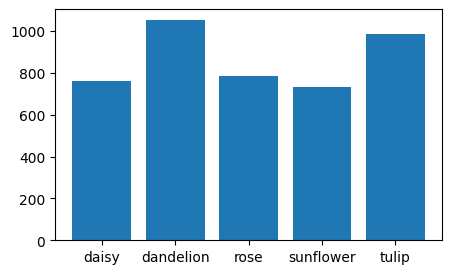

In [22]:
#Plotting data 
plt.figure(figsize=(5,3))
plt.bar(dict_data.keys(), dict_data.values())
plt.show()
#There is data imbalance is present in data

In [23]:
#Balancing data using Augmentation technique
import Augmentor

In [24]:
path_d = 'D:\\Data Science\\Main Course\\Deep Learning\\CNN\\flower classification\\own model\\flowers\\'

In [25]:
for i in classes:
    p = Augmentor.Pipeline(path_d + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.7)
    p.sample(1200)

Initialised with 764 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\flower classification\own model\flowers\daisy\output.

Processing <PIL.Image.Image image mode=RGB size=320x240 at 0x140A076C880>: 100%|██████████| 1200/1200 [00:04<00:00, 290.90 Samples/s]                  


Initialised with 1052 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\flower classification\own model\flowers\dandelion\output.

Processing <PIL.Image.Image image mode=RGB size=180x240 at 0x140A85606A0>: 100%|██████████| 1200/1200 [00:04<00:00, 261.85 Samples/s]                  


Initialised with 784 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\flower classification\own model\flowers\rose\output.

Processing <PIL.Image.Image image mode=RGB size=320x262 at 0x140A06AE160>: 100%|██████████| 1200/1200 [00:04<00:00, 267.26 Samples/s]                  


Initialised with 733 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\flower classification\own model\flowers\sunflower\output.

Processing <PIL.Image.Image image mode=RGB size=500x332 at 0x140A06F9B20>: 100%|██████████| 1200/1200 [00:05<00:00, 238.87 Samples/s]                  


Initialised with 984 image(s) found.
Output directory set to D:\Data Science\Main Course\Deep Learning\CNN\flower classification\own model\flowers\tulip\output.

Processing <PIL.Image.Image image mode=RGB size=500x333 at 0x14094E184C0>: 100%|██████████| 1200/1200 [00:05<00:00, 202.36 Samples/s]                  


In [26]:
#imagecount in data set
count_new = len(list(data_dict.glob('*/output/*.jpg')))
count_new

6000

In [27]:
#adding new images to data set
from glob import glob
path_list = [x for x in glob(os.path.join(data_dict, '*','output', '*.jpg'))]
path_list

['D:\\Data Science\\Main Course\\Deep Learning\\CNN\\flower classification\\own model\\flowers\\daisy\\output\\daisy_original_100080576_f52e8ee070_n.jpg_a559f454-05a0-4140-9eb4-c18adf29b265.jpg',
 'D:\\Data Science\\Main Course\\Deep Learning\\CNN\\flower classification\\own model\\flowers\\daisy\\output\\daisy_original_10172379554_b296050f82_n.jpg_521633bc-9f1e-41f1-a0db-7ae005a35222.jpg',
 'D:\\Data Science\\Main Course\\Deep Learning\\CNN\\flower classification\\own model\\flowers\\daisy\\output\\daisy_original_10172567486_2748826a8b.jpg_b9b57928-9fb1-445b-a95e-25c18adcc8f4.jpg',
 'D:\\Data Science\\Main Course\\Deep Learning\\CNN\\flower classification\\own model\\flowers\\daisy\\output\\daisy_original_10172567486_2748826a8b.jpg_d005f3d2-f35e-4578-9247-9122320b8f4f.jpg',
 'D:\\Data Science\\Main Course\\Deep Learning\\CNN\\flower classification\\own model\\flowers\\daisy\\output\\daisy_original_10172636503_21bededa75_n.jpg_1dd9a23e-7c21-43ea-b8bc-a1a0daa16bad.jpg',
 'D:\\Data Scien

In [28]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dict, '*','output', '*.jpg'))]
lesion_list_new

['daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',


In [29]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [30]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df =(df2)

In [31]:
new_df['Label'].value_counts()

daisy        1200
dandelion    1200
rose         1200
sunflower    1200
tulip        1200
Name: Label, dtype: int64

In [32]:
#Splitting data into train and test
path_new = 'D:\\Data Science\\Main Course\\Deep Learning\\CNN\\flower classification\\own model\\flowers'

In [33]:
train_new = tensorflow.keras.preprocessing.image_dataset_from_directory(path_new, validation_split=0.2, subset= 'training', seed= 123, image_size= (img_height,img_width),batch_size= 16)

Found 10317 files belonging to 5 classes.
Using 8254 files for training.


In [34]:
val_new = tensorflow.keras.preprocessing.image_dataset_from_directory(path_new, validation_split=0.2, subset= 'validation', seed= 123, image_size= (img_height,img_width),batch_size= 16)

Found 10317 files belonging to 5 classes.
Using 2063 files for validation.


In [35]:
#Building model
model3 = Sequential()

model3.add(tensorflow.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape= input_shape))
#Adding first layer
model3.add(Conv2D(32,(3,3), padding= 'same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(32,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3), padding= 'same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(128,(3,3), padding= 'same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(128,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(256,(3,3), padding= 'same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(256,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(512,(3,3), padding= 'same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(512,(3,3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(256))
model3.add(Dropout(0.3))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))

model3.add(Dense(len(classes)))
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
activation_20 (Activation)   (None, 180, 180, 32)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 180, 180, 32)      128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 178, 178, 32)      9248      
_________________________________________________________________
activation_21 (Activation)   (None, 178, 178, 32)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 178, 178, 32)     

In [36]:
model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model3.fit(train_new, validation_data= val_new, epochs= 30)

Epoch 1/30
516/516 [==============================] - 81s 150ms/step - loss: 1.6697 - accuracy: 0.3718 - val_loss: 1.4988 - val_accuracy: 0.3582
Epoch 2/30
516/516 [==============================] - 74s 144ms/step - loss: 1.2499 - accuracy: 0.4948 - val_loss: 1.1886 - val_accuracy: 0.5128
Epoch 3/30
516/516 [==============================] - 74s 144ms/step - loss: 1.1478 - accuracy: 0.5412 - val_loss: 1.1474 - val_accuracy: 0.5347
Epoch 4/30
516/516 [==============================] - 74s 144ms/step - loss: 1.0993 - accuracy: 0.5686 - val_loss: 1.3033 - val_accuracy: 0.4556
Epoch 5/30
516/516 [==============================] - 74s 144ms/step - loss: 1.0483 - accuracy: 0.5887 - val_loss: 1.2004 - val_accuracy: 0.5385
Epoch 6/30
516/516 [==============================] - 74s 144ms/step - loss: 0.9917 - accuracy: 0.6157 - val_loss: 1.0795 - val_accuracy: 0.5797
Epoch 7/30
516/516 [==============================] - 75s 144ms/step - loss: 0.9638 - accuracy: 0.6208 - val_loss: 1.0414 - val_ac

In [38]:
#Checking for accuracy
acc_train_3 = model3.evaluate(train_new)[1]
acc_val_3 = model3.evaluate(val_new)[1]
print('training accuracy of model3 =', acc_train_3)
print('validation accuracy of model3 =', acc_val_3)
#Got good accuracy but still has some overfit

129/129 [==============================] - 4s 34ms/step - loss: 0.6062 - accuracy: 0.7911
training accuracy of model3 = 0.9030773043632507
validation accuracy of model3 = 0.7910809516906738
